In [1]:
# importing the libraries
import numpy as np
import torch 
from torch import nn
from torch.nn import functional as F
import matplotlib.pyplot as plt

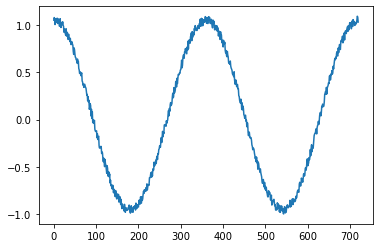

In [2]:
#dataset
x = np.arange(720)
y = np.cos(np.radians(x)) + np.random.rand(720)*0.1
plt.figure()
plt.plot(x,y,label='cos')
plt.show()

![title]("img/dd.png")


In [3]:
# data pre-processing
X = []
Y = []
for i in range(y.shape[0]-10):
  lis = []
  for j in range(i,i+10):
    lis.append(y[j])
  X.append(lis)
  Y.append(y[i+10])

X = np.array(X)
Y = np.array(Y)


X = torch.tensor(X,dtype=torch.float32).reshape(-1,10,1)
Y = torch.tensor(Y)



In [6]:
# network
class net(nn.Module):
  def __init__(self):
    super(net,self).__init__()
    self.l1 = nn.LSTM(input_size=1,hidden_size=20,num_layers=1,batch_first=True)
    self.l2 = nn.Linear(in_features=20,out_features=1)
  
  def forward(self,x):
    print(x.shape)
    x,_ = self.l1(x)
    print(x.shape)
    x = self.l2(torch.relu(x[:,-1]))
    print(x.shape)
    return x

model = net()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device=torch.device('cpu')
print(device)

model = model.to(device)
X = X.to(device)
Y = Y.to(device)


cpu


In [7]:
# from torchsummary import summary
# summary(model, input_size=(10,1), batch_size=-1)

from modelsummary import summary


# show input shape
summary(model,  torch.zeros((700,10,1)), show_input=True, show_hierarchical=False)



torch.Size([700, 10, 1])
torch.Size([700, 10, 20])
torch.Size([700, 1])
-----------------------------------------------------------------------
             Layer (type)                Input Shape         Param #
                   LSTM-1                [-1, 10, 1]               0
                 Linear-2                   [-1, 20]              21
Total params: 21
Trainable params: 21
Non-trainable params: 0
-----------------------------------------------------------------------


In [34]:
# from torchsummary import summary



# print(model)
# summary(model,( 10, 1))
# # converting to tensor
# print(X.shape, Y.shape)



In [35]:
# model params
epochs = 3000
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)
criterion = nn.MSELoss()

In [36]:
print(X.shape)

torch.Size([710, 10, 1])


In [38]:
# forward loop
print(model)
for i in range(epochs):
  y_pred = model(X)
  print(X.shape, y_pred.shape, Y.shape)
  term
  cost = criterion(y_pred,Y.reshape(-1,1).float())
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()
  if i == 500:
    optimizer.lr = 0.005
  if i%500 == 0:
    print(cost)

net(
  (l1): LSTM(1, 20, batch_first=True)
  (l2): Linear(in_features=20, out_features=1, bias=True)
)
torch.Size([710, 10, 1])
torch.Size([710, 10, 20])
torch.Size([710, 1])
torch.Size([710, 10, 1]) torch.Size([710, 1]) torch.Size([710])


NameError: name 'term' is not defined